In [1]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from datetime import datetime

tf.random.set_seed(1)
random.seed(1)



In [2]:
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
FEATURES = [
    "sex",
    "length",
    "diameter",
    "height",
    "whole_weight",
    "shucked_weight",
    "viscera_weight",
    "shell_weight"
]
LABEL = "rings"
COLUMNS = FEATURES + [LABEL]
COLUMNS

['sex',
 'length',
 'diameter',
 'height',
 'whole_weight',
 'shucked_weight',
 'viscera_weight',
 'shell_weight',
 'rings']

In [3]:
data = pd.read_csv(DATASET_URL, names=COLUMNS)
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# Data Types Before
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# data[LABEL] = data[LABEL].astype(np.float64)

# Normalise Features
for feature in FEATURES:
    if data[feature].dtype == "float64":
        print(feature)
        # min_max_scaler = preprocessing.MinMaxScaler()
        # data[[feature]] = min_max_scaler.fit_transform(data[[feature]])
        standard_scaler = preprocessing.StandardScaler()
        data[[feature]] = standard_scaler.fit_transform(data[[feature]])

# min_max_scaler = preprocessing.MinMaxScaler()
# data[[LABEL]] = min_max_scaler.fit_transform(data[[LABEL]])

data.info()


length
diameter
height
whole_weight
shucked_weight
viscera_weight
shell_weight
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
data.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4177.000000
mean,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16,9.933684
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,3.224169
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,1.000000
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,8.000000
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,9.000000
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,11.000000
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,29.000000


In [7]:
# Float64 -> Float32
for feature in FEATURES:
    if data[feature].dtype == "float64":
        data[feature] = data[feature].astype("float32")
    
# Object -> Category
data["sex"] = data["sex"].astype("category")
# data[LABEL] = data[LABEL].astype("float32")
data[LABEL] = data[LABEL].astype("category")
data.dtypes

sex               category
length             float32
diameter           float32
height             float32
whole_weight       float32
shucked_weight     float32
viscera_weight     float32
shell_weight       float32
rings             category
dtype: object

In [8]:
# Missing values
data.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [9]:
# Class Balance
data[LABEL].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
1       1
25      1
2       1
29      1
Name: rings, dtype: int64

In [10]:
# Label Encode
labelencoder = preprocessing.LabelEncoder()
data[LABEL] = labelencoder.fit_transform(data[LABEL])
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,14
1,M,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,6
2,F,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,8
3,M,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,9
4,I,-1.615543,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,6


In [11]:
data[LABEL].nunique()

28

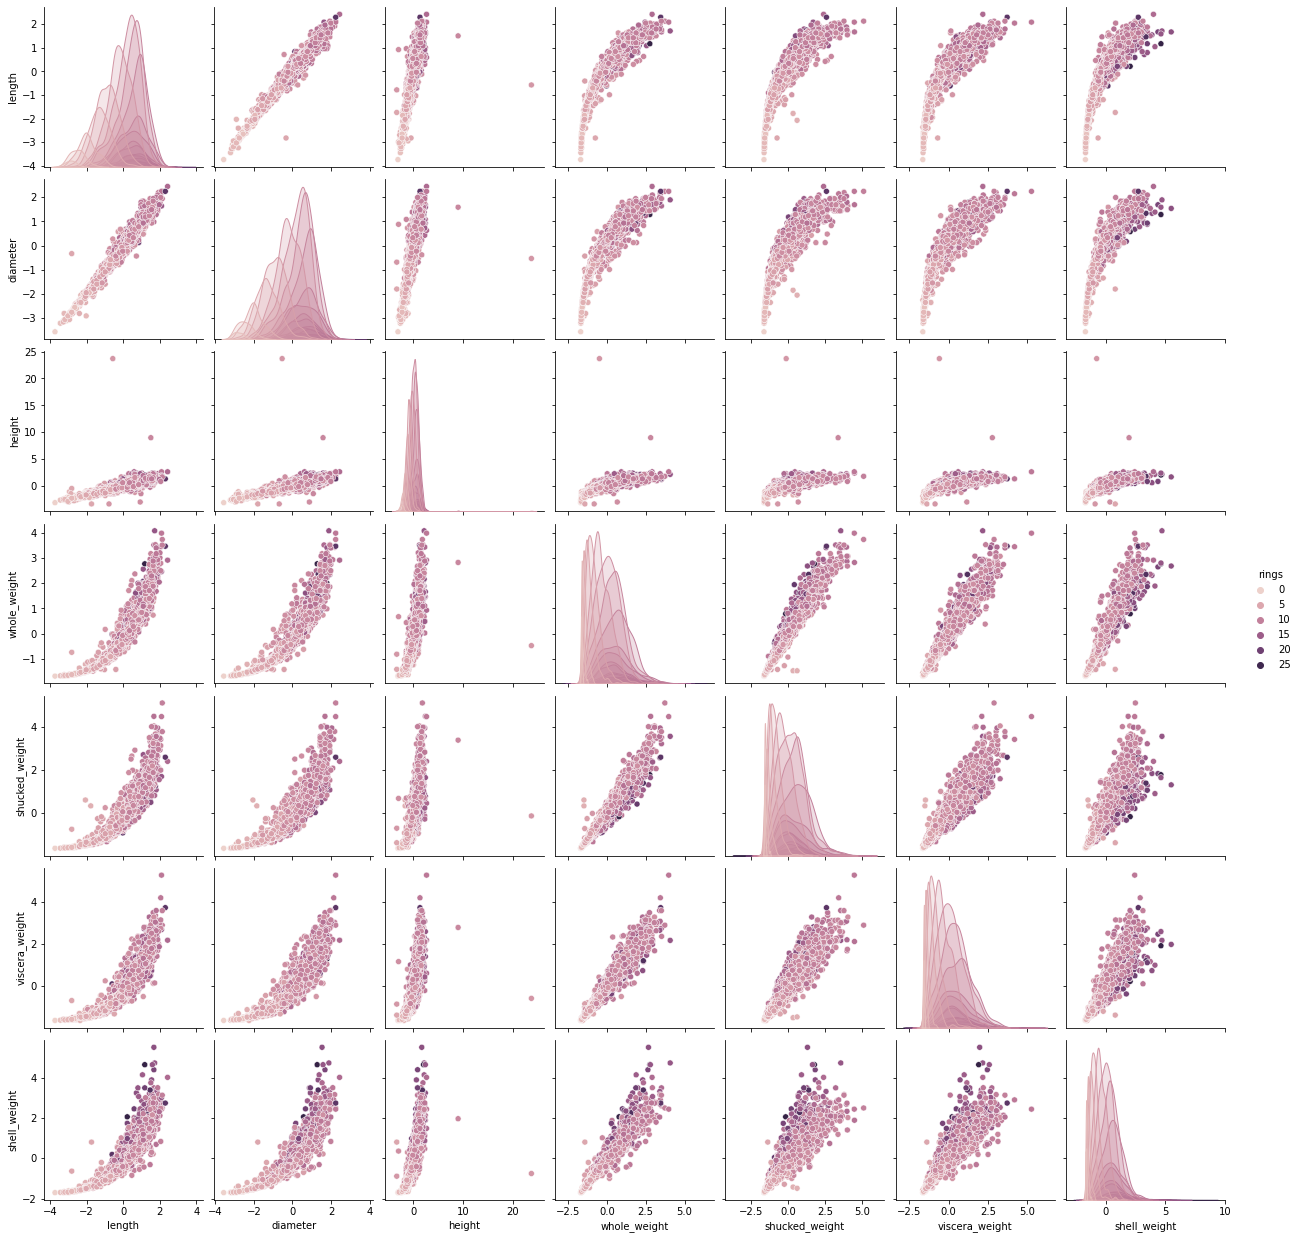

In [12]:
sns.pairplot(data, hue=LABEL)

In [13]:
target = data.pop(LABEL)
target

0       14
1        6
2        8
3        9
4        6
        ..
4172    10
4173     9
4174     8
4175     9
4176    11
Name: rings, Length: 4177, dtype: int64

In [14]:
data = pd.get_dummies(data)
data

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,0,0,1
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,0,0,1
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,1,0,0
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0,0,1
4,-1.615543,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,1,0,0
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0,0,1
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,0,0,1
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,1,0,0


In [15]:
# Split train and test set
train_x, test_x, train_y, test_y = train_test_split(
		data, target, test_size=0.3, shuffle=True)

# Set training dataset
train = tf.data.Dataset.from_tensor_slices(
		(train_x.values, train_y.values))
train = train.shuffle(
		1024,
		seed=1
)
train = train.batch(50)

# Set testing dataset
test = tf.data.Dataset.from_tensor_slices(
		(test_x.values, test_y.values))
test = test.shuffle(
		1024,
		seed=1
)
test = test.batch(50)

In [16]:
model = tf.keras.models.Sequential([
	tf.keras.layers.Dense(36),
	tf.keras.layers.LeakyReLU(alpha=0.3),

	tf.keras.layers.Dense(28)
])

In [17]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

current_time = datetime.now().strftime('%Y%m%d-%H%M%S')
log_dir = "{}/{}".format("../../../logs/keras/", current_time)
        
model.compile(optimizer=optimiser,
              loss=loss_fn,
              metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
model.fit(train, epochs=200, callbacks=[tensorboard_callback])

Epoch 1/200
59/59 [==============================] - 2s 6ms/step - loss: 3.1148 - accuracy: 0.1540
Epoch 2/200
59/59 [==============================] - 0s 1ms/step - loss: 2.6386 - accuracy: 0.2172
Epoch 3/200
59/59 [==============================] - 0s 2ms/step - loss: 2.3786 - accuracy: 0.2337
Epoch 4/200
59/59 [==============================] - 0s 7ms/step - loss: 2.2519 - accuracy: 0.2460
Epoch 5/200
59/59 [==============================] - 0s 2ms/step - loss: 2.1831 - accuracy: 0.2470
Epoch 6/200
59/59 [==============================] - 0s 2ms/step - loss: 2.1410 - accuracy: 0.2535
Epoch 7/200
59/59 [==============================] - 0s 3ms/step - loss: 2.1120 - accuracy: 0.2535
Epoch 8/200
59/59 [==============================] - 0s 1ms/step - loss: 2.0896 - accuracy: 0.2627
Epoch 9/200
59/59 [==============================] - 0s 1ms/step - loss: 2.0739 - accuracy: 0.2535
Epoch 10/200
59/59 [==============================] - 0s 2ms/step - loss: 2.0580 - accuracy: 0.2559
Epoch 11/